#### Reference: https://github.com/bnsreenu/python_for_microscopists/blob/master/167-LSTM_text_generation_ENGLISH.py

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.optimizers import RMSprop
import numpy as np
import random
import sys

Using TensorFlow backend.


In [3]:
#LOAD DATA
filename = "./jungle_book.txt"
raw_text = open(filename, 'r', encoding='utf-8').read()
raw_text = raw_text.lower()
print(raw_text[0:100])

﻿the project gutenberg ebook of the jungle book, by rudyard kipling

this ebook is for the use of an


In [4]:
#CLEAN TEXT : remove number
raw_text = ''.join(c for c in raw_text if not c.isdigit())

In [5]:
chars = sorted(list(set(raw_text))) #List of every character

In [6]:
#Create a dictionary of characters mapped to integer values
char_to_int = dict((c, i) for i, c in enumerate(chars))

#Do the reverse so we can print our predictions in characters and not integers
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [7]:
# summarize the data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters in the text; corpus length: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters in the text; corpus length:  292870
Total Vocab:  51


In [8]:
seq_length = 60  #Length of each input sequence
step = 10 
sentences = []    # X values (Sentences)
next_chars = []   # Y values: next value follow X
for i in range(0, n_chars - seq_length, step):  #step=1 means each sentence is offset just by a single letter
    sentences.append(raw_text[i: i + seq_length])  #Sequence in
    next_chars.append(raw_text[i + seq_length])  #Sequence out
n_patterns = len(sentences)    
print('Number of sequences:', n_patterns)

Number of sequences: 29281


In [9]:
#Vectorization returns a vector for all sentences indicating the presence or absence of a character. 

x = np.zeros((len(sentences), seq_length, n_vocab), dtype=np.bool)
y = np.zeros((len(sentences), n_vocab), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_int[char]] = 1
    y[i, char_to_int[next_chars[i]]] = 1
    
print(x.shape)
print(y.shape)

print(y[0:10])

(29281, 60, 51)
(29281, 51)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False  True False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True False False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False False False False False False False
  False False False]
 [False  True False F

In [10]:
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, n_vocab)))
model.add(Dense(n_vocab, activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               92160     
_________________________________________________________________
dense (Dense)                (None, 51)                6579      
Total params: 98,739
Trainable params: 98,739
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
filepath="saved_weights/saved_weights-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# Fit the model

history = model.fit(x, y,
          batch_size=128,
          epochs=50,   
          callbacks=callbacks_list)

model.save('weights_jungle_book_50epochs.h5')

Epoch 1/50
229/229 [==============================] - ETA: 0s - loss: 0.6643
Epoch 00001: loss improved from inf to 0.66430, saving model to saved_weights\saved_weights-01-0.6643.hdf5
229/229 [==============================] - 17s 76ms/step - loss: 0.6643
Epoch 2/50
229/229 [==============================] - ETA: 0s - loss: 0.6188
Epoch 00002: loss improved from 0.66430 to 0.61878, saving model to saved_weights\saved_weights-02-0.6188.hdf5
229/229 [==============================] - 17s 76ms/step - loss: 0.6188
Epoch 3/50
229/229 [==============================] - ETA: 0s - loss: 0.6177
Epoch 00003: loss improved from 0.61878 to 0.61774, saving model to saved_weights\saved_weights-03-0.6177.hdf5
229/229 [==============================] - 19s 83ms/step - loss: 0.6177
Epoch 4/50
228/229 [============================>.] - ETA: 0s - loss: 0.6140
Epoch 00004: loss improved from 0.61774 to 0.61354, saving model to saved_weights\saved_weights-04-0.6135.hdf5
229/229 [===========================

Epoch 34/50
229/229 [==============================] - ETA: 0s - loss: 0.4416
Epoch 00034: loss did not improve from 0.44028
229/229 [==============================] - 14s 63ms/step - loss: 0.4416
Epoch 35/50
229/229 [==============================] - ETA: 0s - loss: 0.4409
Epoch 00035: loss did not improve from 0.44028
229/229 [==============================] - 17s 75ms/step - loss: 0.4409
Epoch 36/50
229/229 [==============================] - ETA: 0s - loss: 0.4337
Epoch 00036: loss improved from 0.44028 to 0.43373, saving model to saved_weights\saved_weights-36-0.4337.hdf5
229/229 [==============================] - 19s 82ms/step - loss: 0.4337
Epoch 37/50
229/229 [==============================] - ETA: 0s - loss: 0.4278
Epoch 00037: loss improved from 0.43373 to 0.42777, saving model to saved_weights\saved_weights-37-0.4278.hdf5
229/229 [==============================] - 18s 77ms/step - loss: 0.4278
Epoch 38/50
229/229 [==============================] - ETA: 0s - loss: 0.4210
Epoch 

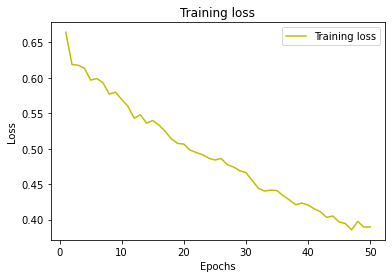

In [17]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
#Generate character
def GenerateCharacter(preds):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1) 
    return np.argmax(probas)


In [21]:
# load the network weights
filename = "weights_jungle_book_50epochs.h5"
model.load_weights(filename)

#Pick a random sentence from the text as seed.
start_index = random.randint(0, n_chars - seq_length - 1)

#Initiate generated text and keep adding new predictions and print them out
generated = ''
sentence = raw_text[start_index: start_index + seq_length]
generated += sentence

print('----- Seed for our text prediction: "' + sentence + '"')


for i in range(400):   # Number of characters including spaces
    x_pred = np.zeros((1, seq_length, n_vocab))
    for t, char in enumerate(sentence):
        x_pred[0, t, char_to_int[char]] = 1.

    preds = model.predict(x_pred, verbose=0)[0]
    next_index = GenerateCharacter(preds)
    next_char = int_to_char[next_index]

    generated += next_char
    sentence = sentence[1:] + next_char

    sys.stdout.write(next_char)
    sys.stdout.flush()
print()

----- Seed for our text prediction: "scribing it.

“the red flower?” said mowgli. “that grows out"
 of the holdaling fit bord
wolf elephants 
to any one could bere,” said bit the moon wolf, whand his hee liever alwass
he caug, hai is but the jungle whent deart and are
and agred him in
fromesick. he had to kill..
“what’t i he is i kee.”

“b’sth rikki-tikki knew the clakes, on the pack and livelb, then i little brown soffring
with your to ever withor ne pooked and mowgli begioce, and mowgli at th
